In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/people_v2.csv')
df

Matplotlib is building the font cache; this may take a moment.


,name,age,city,gender,salary,experience
0,Aman,25.0,Delhi,Male,45000.0,2
1,Bhavna,30.0,Mumbai,Female,80000.0,7
2,Chetan,22.0,Pune,Male,30000.0,1
3,Divya,28.0,Bangalore,Female,60000.0,5
4,Aman,25.0,Delhi,Male,45000.0,2
5,Esha,NaN,Mumbai,Female,70000.0,6
6,Farhan,35.0,Delhi,Male,150000.0,12
7,Gauri,29.0,Pune,Female,NaN,4
8,Harsh,45.0,Mumbai,Male,200000.0,20
9,Ishita,23.0,Delhi,Female,35000.0,1


In [3]:
df.head()

,name,age,city,gender,salary,experience
0,Aman,25.0,Delhi,Male,45000.0,2
1,Bhavna,30.0,Mumbai,Female,80000.0,7
2,Chetan,22.0,Pune,Male,30000.0,1
3,Divya,28.0,Bangalore,Female,60000.0,5
4,Aman,25.0,Delhi,Male,45000.0,2


In [4]:
df.tail()

,name,age,city,gender,salary,experience
7,Gauri,29.0,Pune,Female,NaN,4
8,Harsh,45.0,Mumbai,Male,200000.0,20
9,Ishita,23.0,Delhi,Female,35000.0,1
10,Jatin,38.0,Bangalore,Male,120000.0,15
11,Kiran,26.0,Pune,NaN,40000.0,3


In [6]:
df.shape

(12, 6)

In [7]:
df.columns

Index(['name', 'age', 'city', 'gender', 'salary', 'experience'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        12 non-null     object 
 1   age         11 non-null     float64
 2   city        12 non-null     object 
 3   gender      11 non-null     object 
 4   salary      11 non-null     float64
 5   experience  12 non-null     int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 704.0+ bytes


In [9]:
df.describe()

,age,salary,experience
count,11.000000,11.000000,12.000000
mean,29.636364,79545.454545,6.500000
std,7.046598,54747.353610,6.082763
min,22.000000,30000.000000,1.000000
25%,25.000000,42500.000000,2.000000
50%,28.000000,60000.000000,4.500000
75%,32.500000,100000.000000,8.250000
max,45.000000,200000.000000,20.000000


In [11]:
df.isnull().sum()

name          0
age           1
city          0
gender        1
salary        1
experience    0
dtype: int64

In [14]:
df["age"].fillna(df["age"].median())
df["salary"].fillna(df["salary"].median())
df["gender"].fillna(df["gender"].mode()[0])

0       Male
1     Female
2       Male
3     Female
4       Male
5     Female
6       Male
7     Female
8       Male
9     Female
10      Male
11      Male
Name: gender, dtype: object

In [15]:
df.duplicated().sum()

np.int64(1)

In [16]:
df.drop_duplicates(inplace=True)

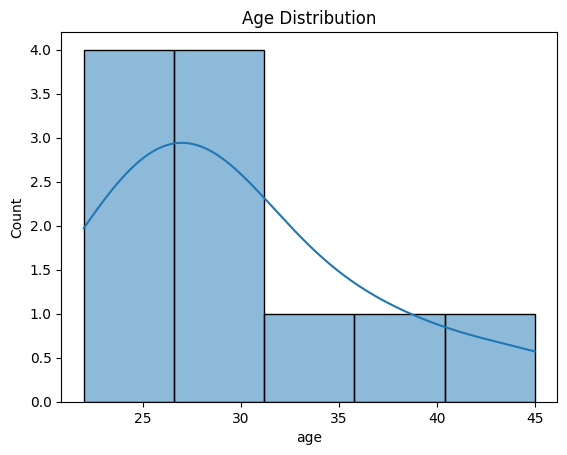

In [17]:
sns.histplot(df["age"], kde=True)
plt.title("Age Distribution")
plt.show()

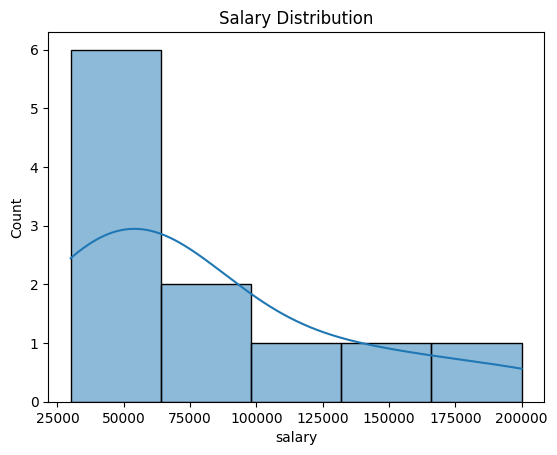

In [18]:
sns.histplot(df["salary"], kde=True)
plt.title("Salary Distribution")
plt.show()

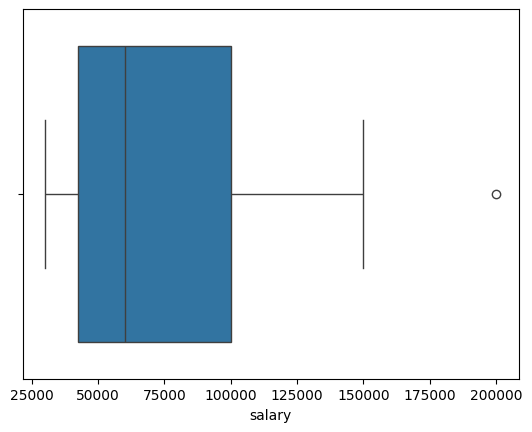

In [19]:
sns.boxplot(x=df["salary"])
plt.show()

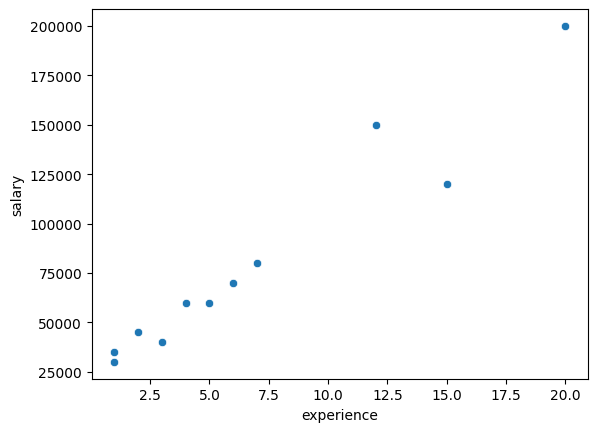

In [20]:
sns.scatterplot(x="experience", y="salary", data=df)
plt.show()

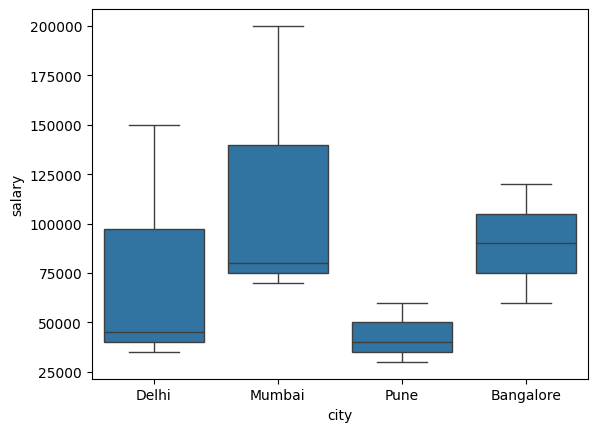

In [21]:
sns.boxplot(x="city", y="salary", data=df)
plt.show()

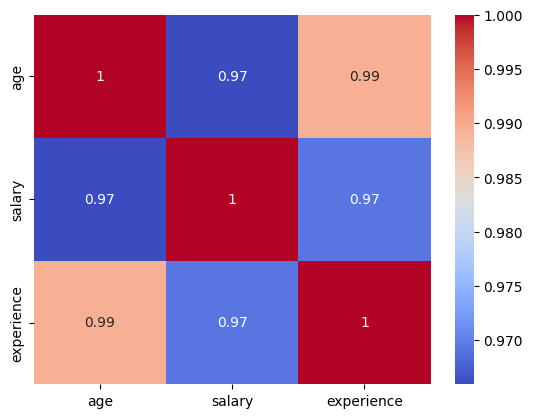

In [22]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [23]:
Q1 = df["salary"].quantile(0.25)
Q2 = df["salary"].quantile(0.50)
Q3 = df["salary"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Q1, Q2, Q3, IQR, lower_bound, upper_bound

(np.float64(42500.0),
 np.float64(60000.0),
 np.float64(100000.0),
 np.float64(57500.0),
 np.float64(-43750.0),
 np.float64(186250.0))

In [24]:
outliers = df[(df["salary"] < lower_bound) | (df["salary"] > upper_bound)]
outliers

,name,age,city,gender,salary,experience
8,Harsh,45.0,Mumbai,Male,200000.0,20
